In [4]:
import os

def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

In [5]:
import zipfile

zip_path = '/content/Apple dataset_mobilenetv2.zip'
extract_dir ='/content/Apple dataset_mobilenetv2'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [6]:
import zipfile

zip_path = '/content/Apple_Black_rot.zip'
extract_dir ='/content/Apple_Black_rot'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [8]:
import zipfile

zip_path = '/content/Apple_Healthy.zip'
extract_dir ='/content/Apple_Healthy'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [7]:
import zipfile

zip_path = '/content/Apple_Cedar_rust.zip'
extract_dir ='/content/Apple_Cedar_rust'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [9]:
import zipfile

zip_path = '/content/Apple_Scab.zip'
extract_dir ='/content/Apple_Scab'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [20]:
import zipfile

zip_path = '/content/Test.zip'
extract_dir ='/content/Test'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [21]:
import zipfile

zip_path = '/content/Train.zip'
extract_dir ='/content/Train'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [22]:
import zipfile

zip_path = '/content/Valid.zip'
extract_dir ='/content/Valid'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [26]:
train_files_healthy = "/content/Apple_Healthy"
train_files_black_rot = "/content/Apple_Black_rot"
train_files_scab = "/content/Apple_Scab"
train_files_rust = "/content/Apple_Cedar_rust"

In [27]:
test_files_healthy = "/content/Apple_Healthy"
test_files_black_rot = "/content/Apple_Black_rot"
test_files_scab = "/content/Apple_Scab"
test_files_rust = "/content/Apple_Cedar_rust"

In [28]:
valid_files_healthy = "/content/Apple_Healthy"
valid_files_black_rot = "/content/Apple_Black_rot"
valid_files_scab = "/content/Apple_Scab"
valid_files_rust = "/content/Apple_Cedar_rust"

In [23]:
print("Number of healthy leaf images in training set", total_files(train_files_healthy))
print("Number of black rot leaf images in training set", total_files(train_files_black_rot))
print("Number of scab leaf images in training set", total_files(train_files_scab))
print("Number of rust leaf images in training set", total_files(train_files_rust))

Number of healthy leaf images in training set 0
Number of black rot leaf images in training set 0
Number of scab leaf images in training set 0
Number of rust leaf images in training set 0


In [24]:
print("Number of healthy leaf images in test set", total_files(test_files_healthy))
print("Number of black rot leaf images in test set", total_files(test_files_black_rot))
print("Number of scab leaf images in test set", total_files(test_files_scab))
print("Number of rust leaf images in test set", total_files(test_files_rust))

Number of healthy leaf images in test set 0
Number of black rot leaf images in test set 0
Number of scab leaf images in test set 0
Number of rust leaf images in test set 0


In [29]:
print("Number of healthy leaf images in validation set", total_files(valid_files_healthy))
print("Number of black rot leaf images in validation set", total_files(valid_files_black_rot))
print("Number of scab leaf images in validation set", total_files(valid_files_scab))
print("Number of rust leaf images in validation set", total_files(valid_files_rust))

Number of healthy leaf images in validation set 0
Number of black rot leaf images in validation set 0
Number of scab leaf images in validation set 0
Number of rust leaf images in validation set 0


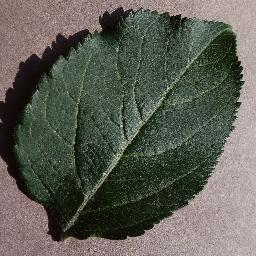

In [30]:
from PIL import Image
import IPython.display as display

image_path = "/content/Apple_Healthy/Apple_Healthy/Sample_Healthy(Apple)(3).PNG"

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

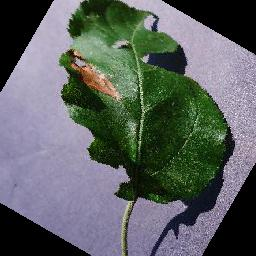

In [31]:
image_path = "/content/Apple_Black_rot/Apple_Black_rot/Sample_Black_rot(Apple)(3).PNG"

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width = 500))

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [33]:
train_generator = train_datagen.flow_from_directory('/content/Train',
                                                    target_size =(225, 225),
                                                    batch_size = 32,
                                                    class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory('/content/Valid',
                                                        target_size = (225, 225),
                                                        batch_size = 32,
                                                        class_mode = 'categorical')

Found 19 images belonging to 1 classes.
Found 19 images belonging to 1 classes.


In [34]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

model = Sequential([
    Input(shape = (225, 225, 3)),
    Conv2D(32, (3, 3), activation = 'relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation = 'relu'),
    MaxPooling2D(pool_size = (2, 2)),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(4, activation = 'softmax')
])

In [35]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [37]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # or 'categorical_crossentropy'
              metrics=['accuracy'])

history = model.fit(train_generator,
                    epochs=5,
                    validation_data=validation_generator)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.0000e+00 - loss: 1.4252 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


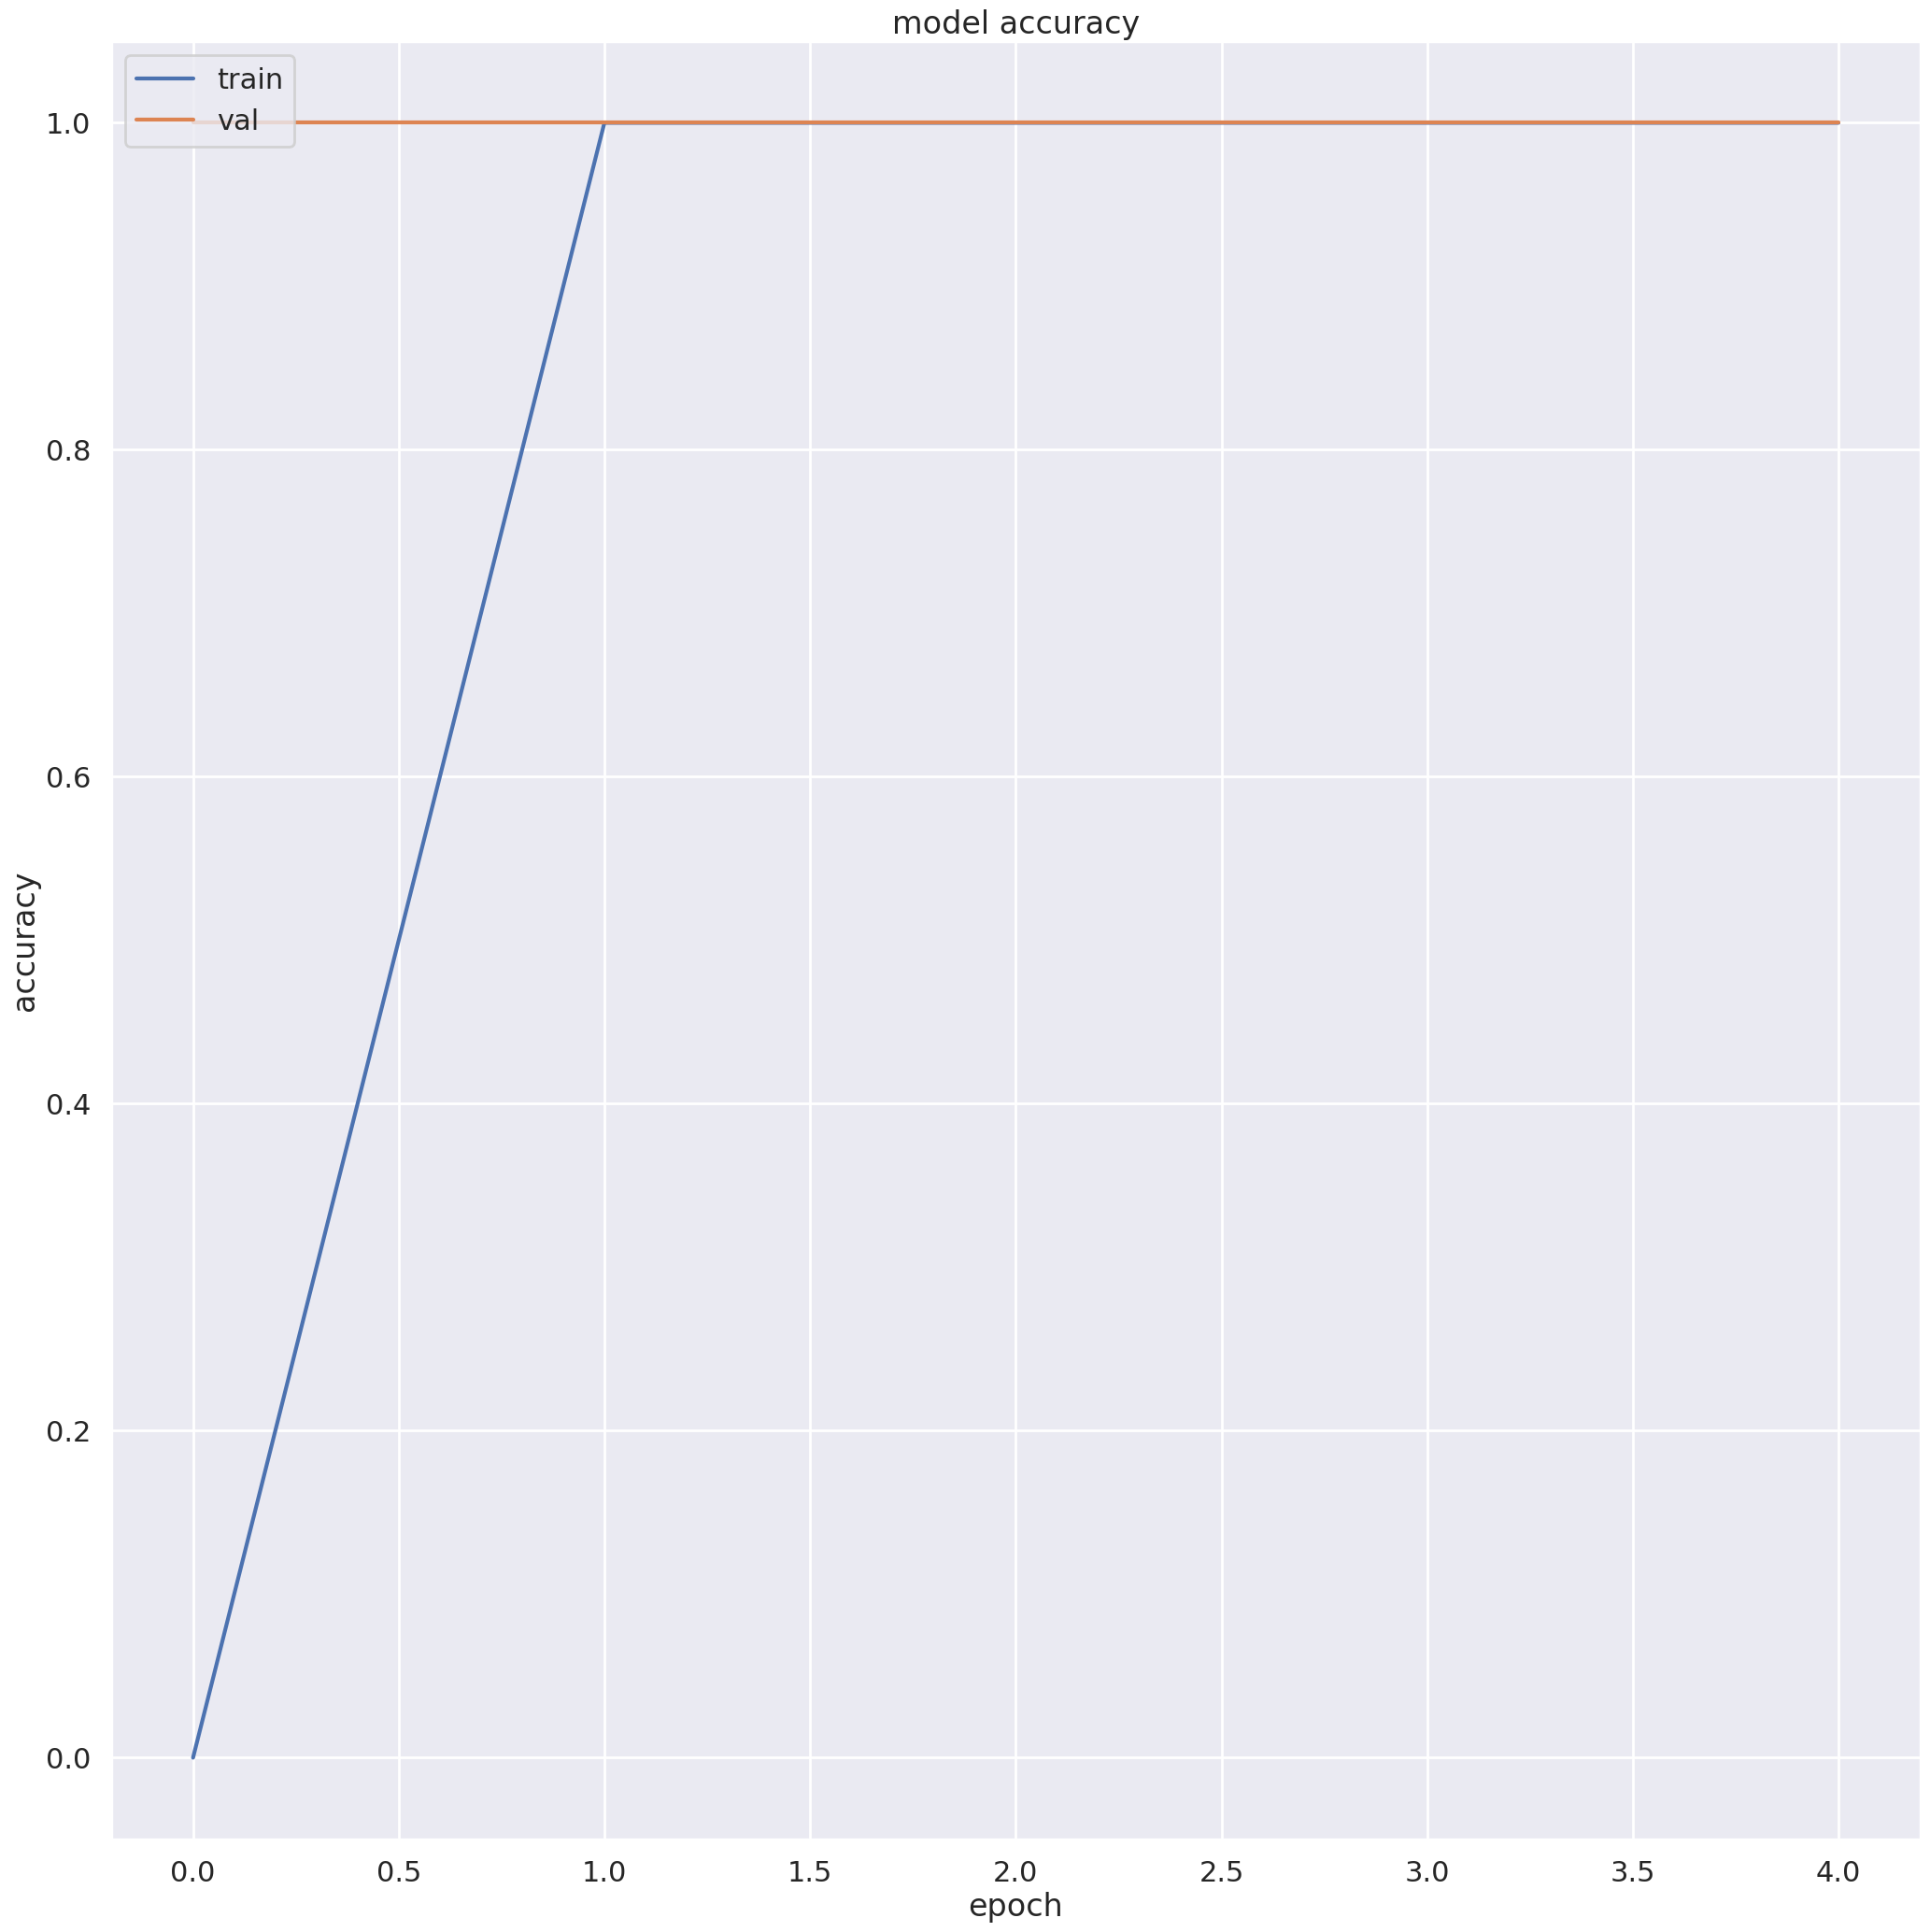

In [38]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize = (25, 25), dpi = 100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

In [39]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import RMSprop

In [40]:
def create_mobilenetv2_model():
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(225, 225, 3))
    base_model.trainable = False  # Freeze convolutional layers

    # Add custom layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)  # Ensure x is a valid tensor
    x = Dense(128, activation='relu')(x)
    output_layer = Dense(4, activation='softmax')(x)  # Ensure output is correctly defined

    model = Model(inputs=base_model.input, outputs=output_layer)  # Use output_layer instead of x
    model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [42]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

def create_mobilenetv2_model(input_shape=(224, 224, 3), num_classes=4):
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False  # Freeze base layers

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',  # match your label shape
                  metrics=['accuracy'])
    return model

In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/Train',
    target_size=(224, 224),  # Must match model input
    batch_size=32,
    class_mode='sparse'      # If using sparse_categorical_crossentropy
)

validation_generator = validation_datagen.flow_from_directory(
    '/content/Valid',
    target_size=(224, 224),  # Must match model input
    batch_size=32,
    class_mode='sparse'
)

Found 19 images belonging to 1 classes.
Found 19 images belonging to 1 classes.


In [47]:
mobilenetv2_model = create_mobilenetv2_model()

history_mobilenetv2 = mobilenetv2_model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.4211 - loss: 1.3218 - val_accuracy: 1.0000 - val_loss: 0.0520
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 1.0000 - loss: 0.0750 - val_accuracy: 1.0000 - val_loss: 0.0037
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 1.0000 - loss: 0.0110 - val_accuracy: 1.0000 - val_loss: 5.2776e-04
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 1.0925e-04
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 1.0000 - loss: 2.6922e-04 - val_accuracy: 1.0000 - val_loss: 2.9117e-05


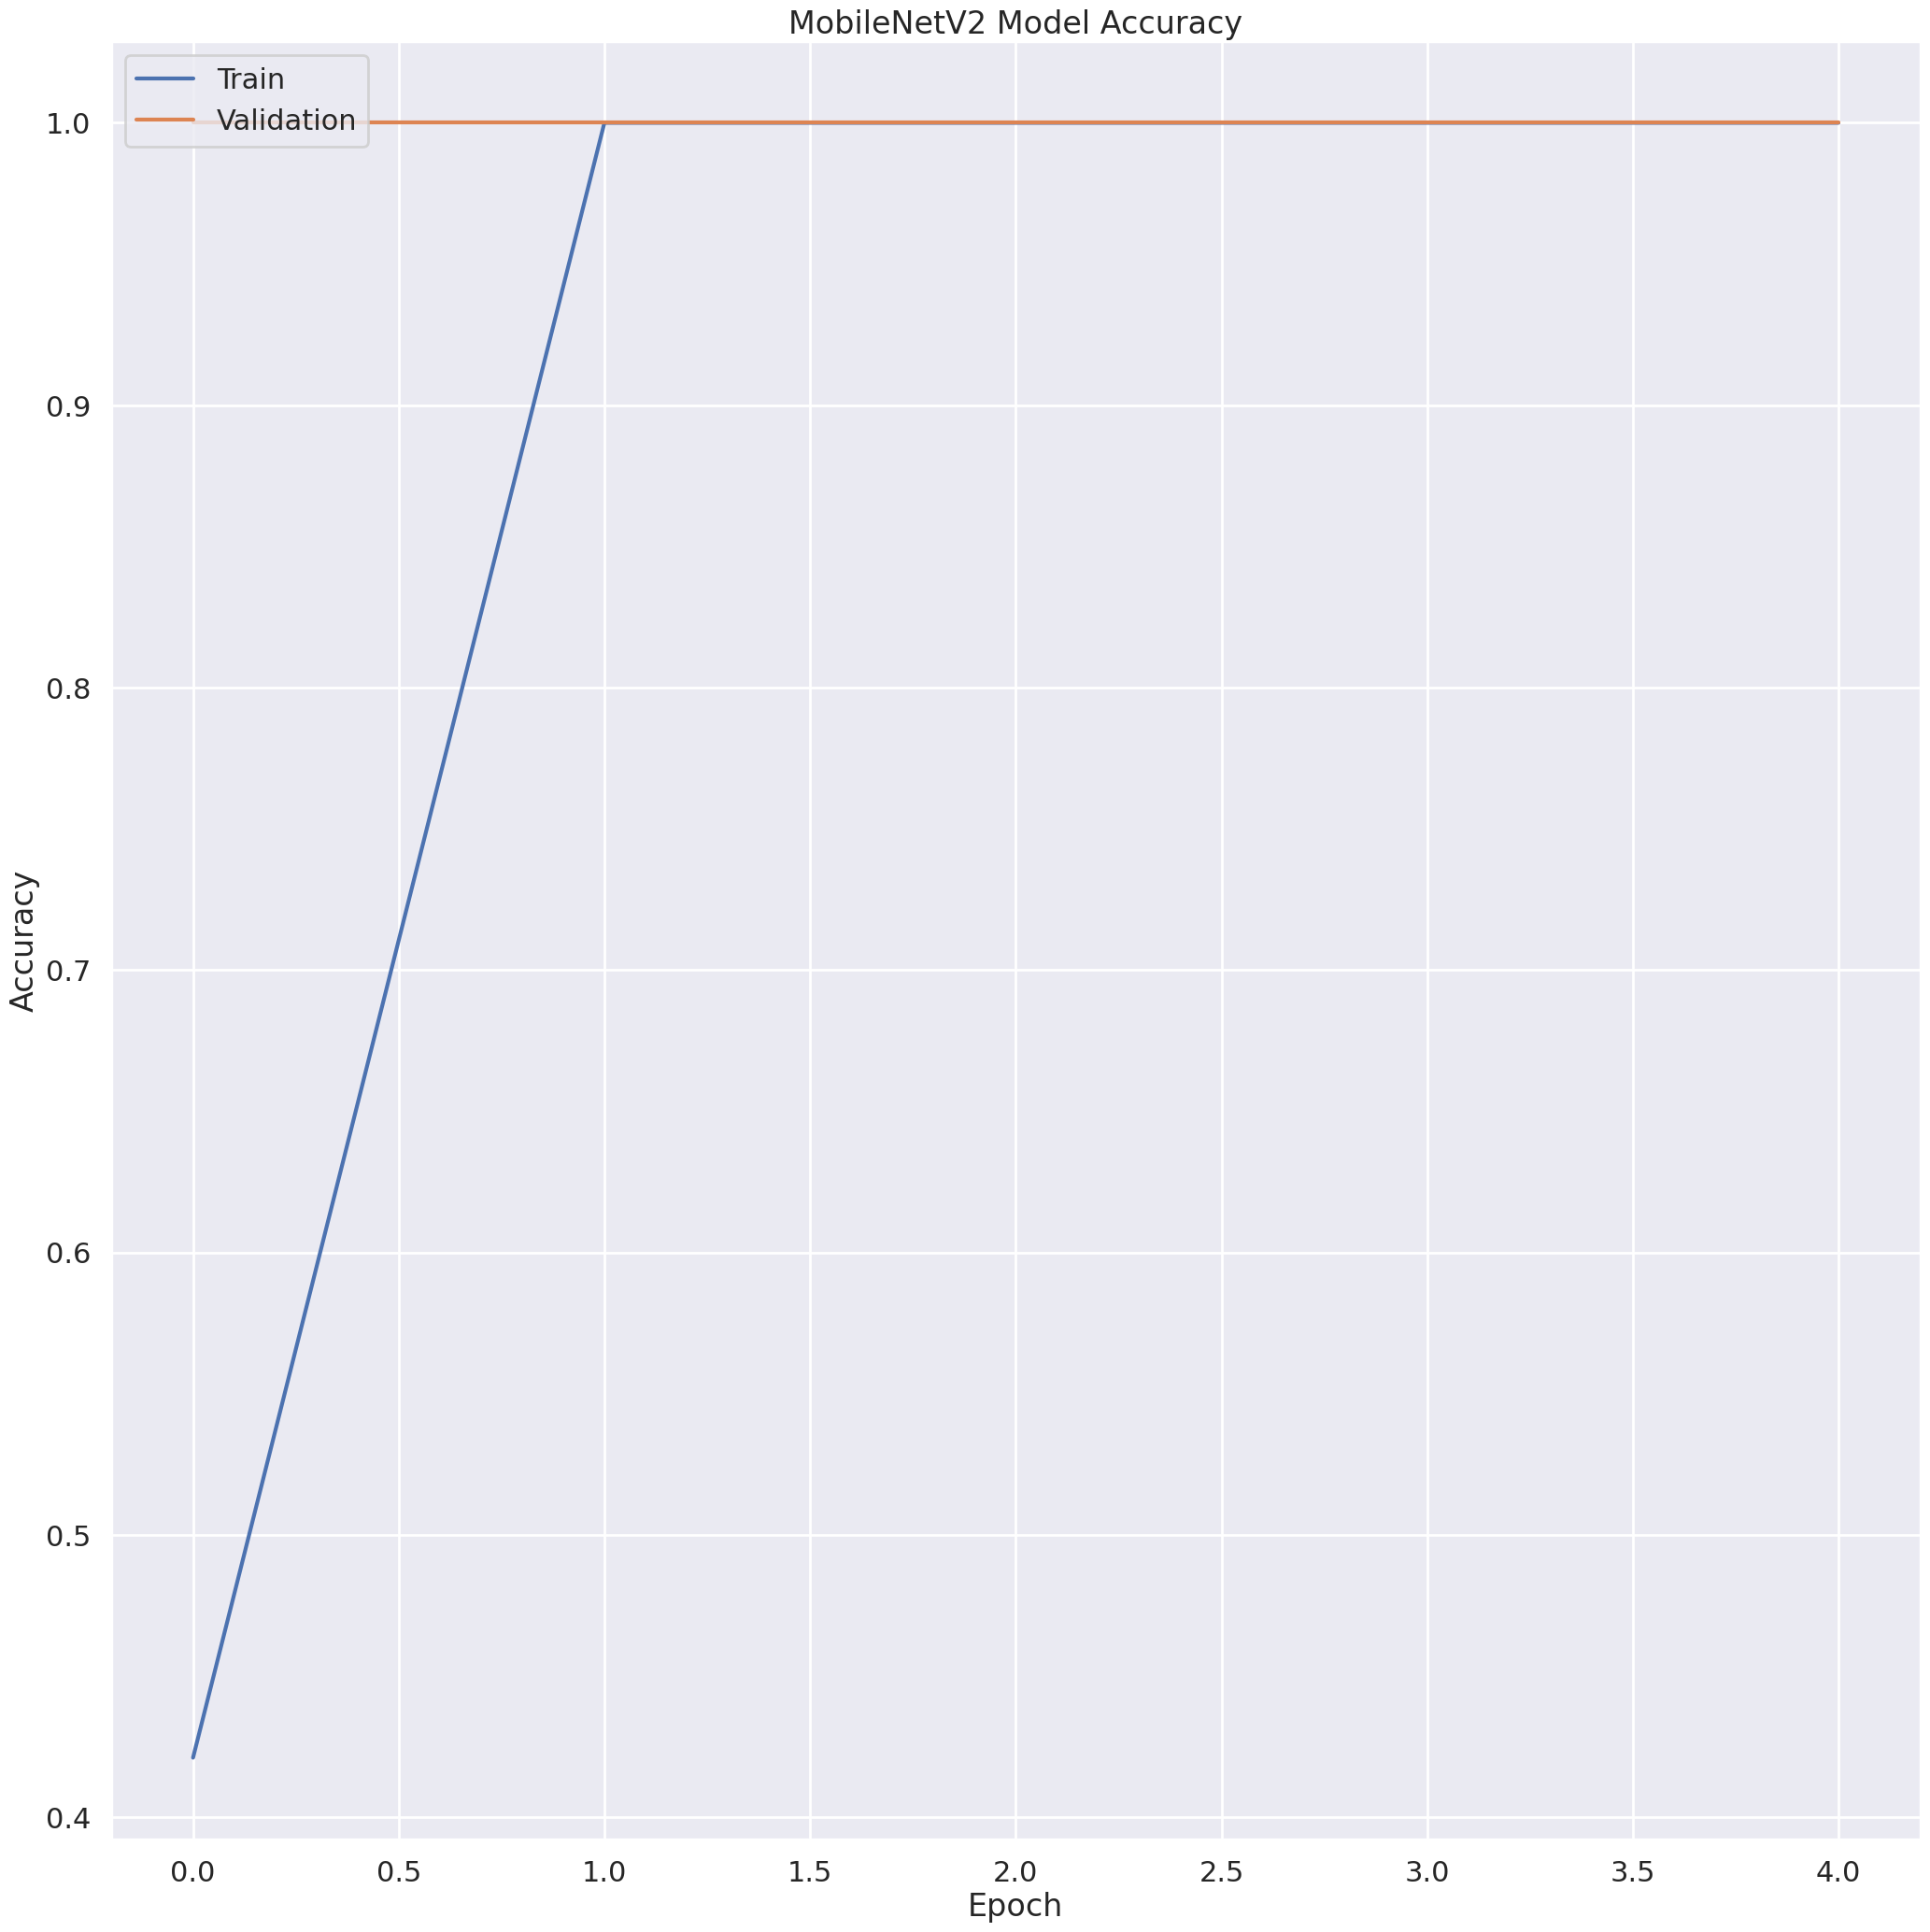

In [48]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

sns.set_theme()
sns.set_context("poster")

figure(figsize=(25, 25), dpi=100)

plt.plot(history_mobilenetv2.history['accuracy'])
plt.plot(history_mobilenetv2.history['val_accuracy'])
plt.title('MobileNetV2 Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [49]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(225, 225, 3))
base_model.trainable = False

x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dense(4, activation='softmax')(x)  # 4 classes

model = Model(inputs=base_model.input, outputs=x)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [55]:
train_generator = train_datagen.flow_from_directory(
    '/content/Train',
    target_size=(225, 225),  # <-- make it match model input
    batch_size=32,
    class_mode='sparse'
)

validation_generator = validation_datagen.flow_from_directory(
    '/content/Valid',
    target_size=(225, 225),  # <-- same here
    batch_size=32,
    class_mode='sparse'
)


Found 19 images belonging to 1 classes.
Found 19 images belonging to 1 classes.


In [57]:
import tensorflow as tf

In [62]:
def create_model(input_shape=(224, 224, 3), num_classes=4):
    base_model = tf.keras.applications.MobileNetV2(
        input_shape=input_shape,
        include_top=False,
        weights='imagenet'
    )
    base_model.trainable = False

    model = tf.keras.Sequential([
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = create_model()  # default input_shape is 224x224

In [60]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/Train',  # <-- your path here
    target_size=(224, 224),  # ✅ FIXED from 225x225
    batch_size=32,
    class_mode='sparse'  # or 'categorical' if you're one-hot encoding
)

validation_generator = val_datagen.flow_from_directory(
    '/content/Valid',  # <-- your path here
    target_size=(224, 224),  # ✅ FIXED from 225x225
    batch_size=32,
    class_mode='sparse'
)

Found 19 images belonging to 1 classes.
Found 19 images belonging to 1 classes.


In [63]:
history = model.fit(train_generator,
                    epochs=5,
                    validation_data=validation_generator)


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.6842 - loss: 0.9254 - val_accuracy: 1.0000 - val_loss: 0.0264
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 1.0000 - loss: 0.0311 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 1.8256e-04
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 1.0000 - loss: 2.8900e-04 - val_accuracy: 1.0000 - val_loss: 3.2235e-05
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 1.0000 - loss: 8.9836e-05 - val_accuracy: 1.0000 - val_loss: 7.7171e-06


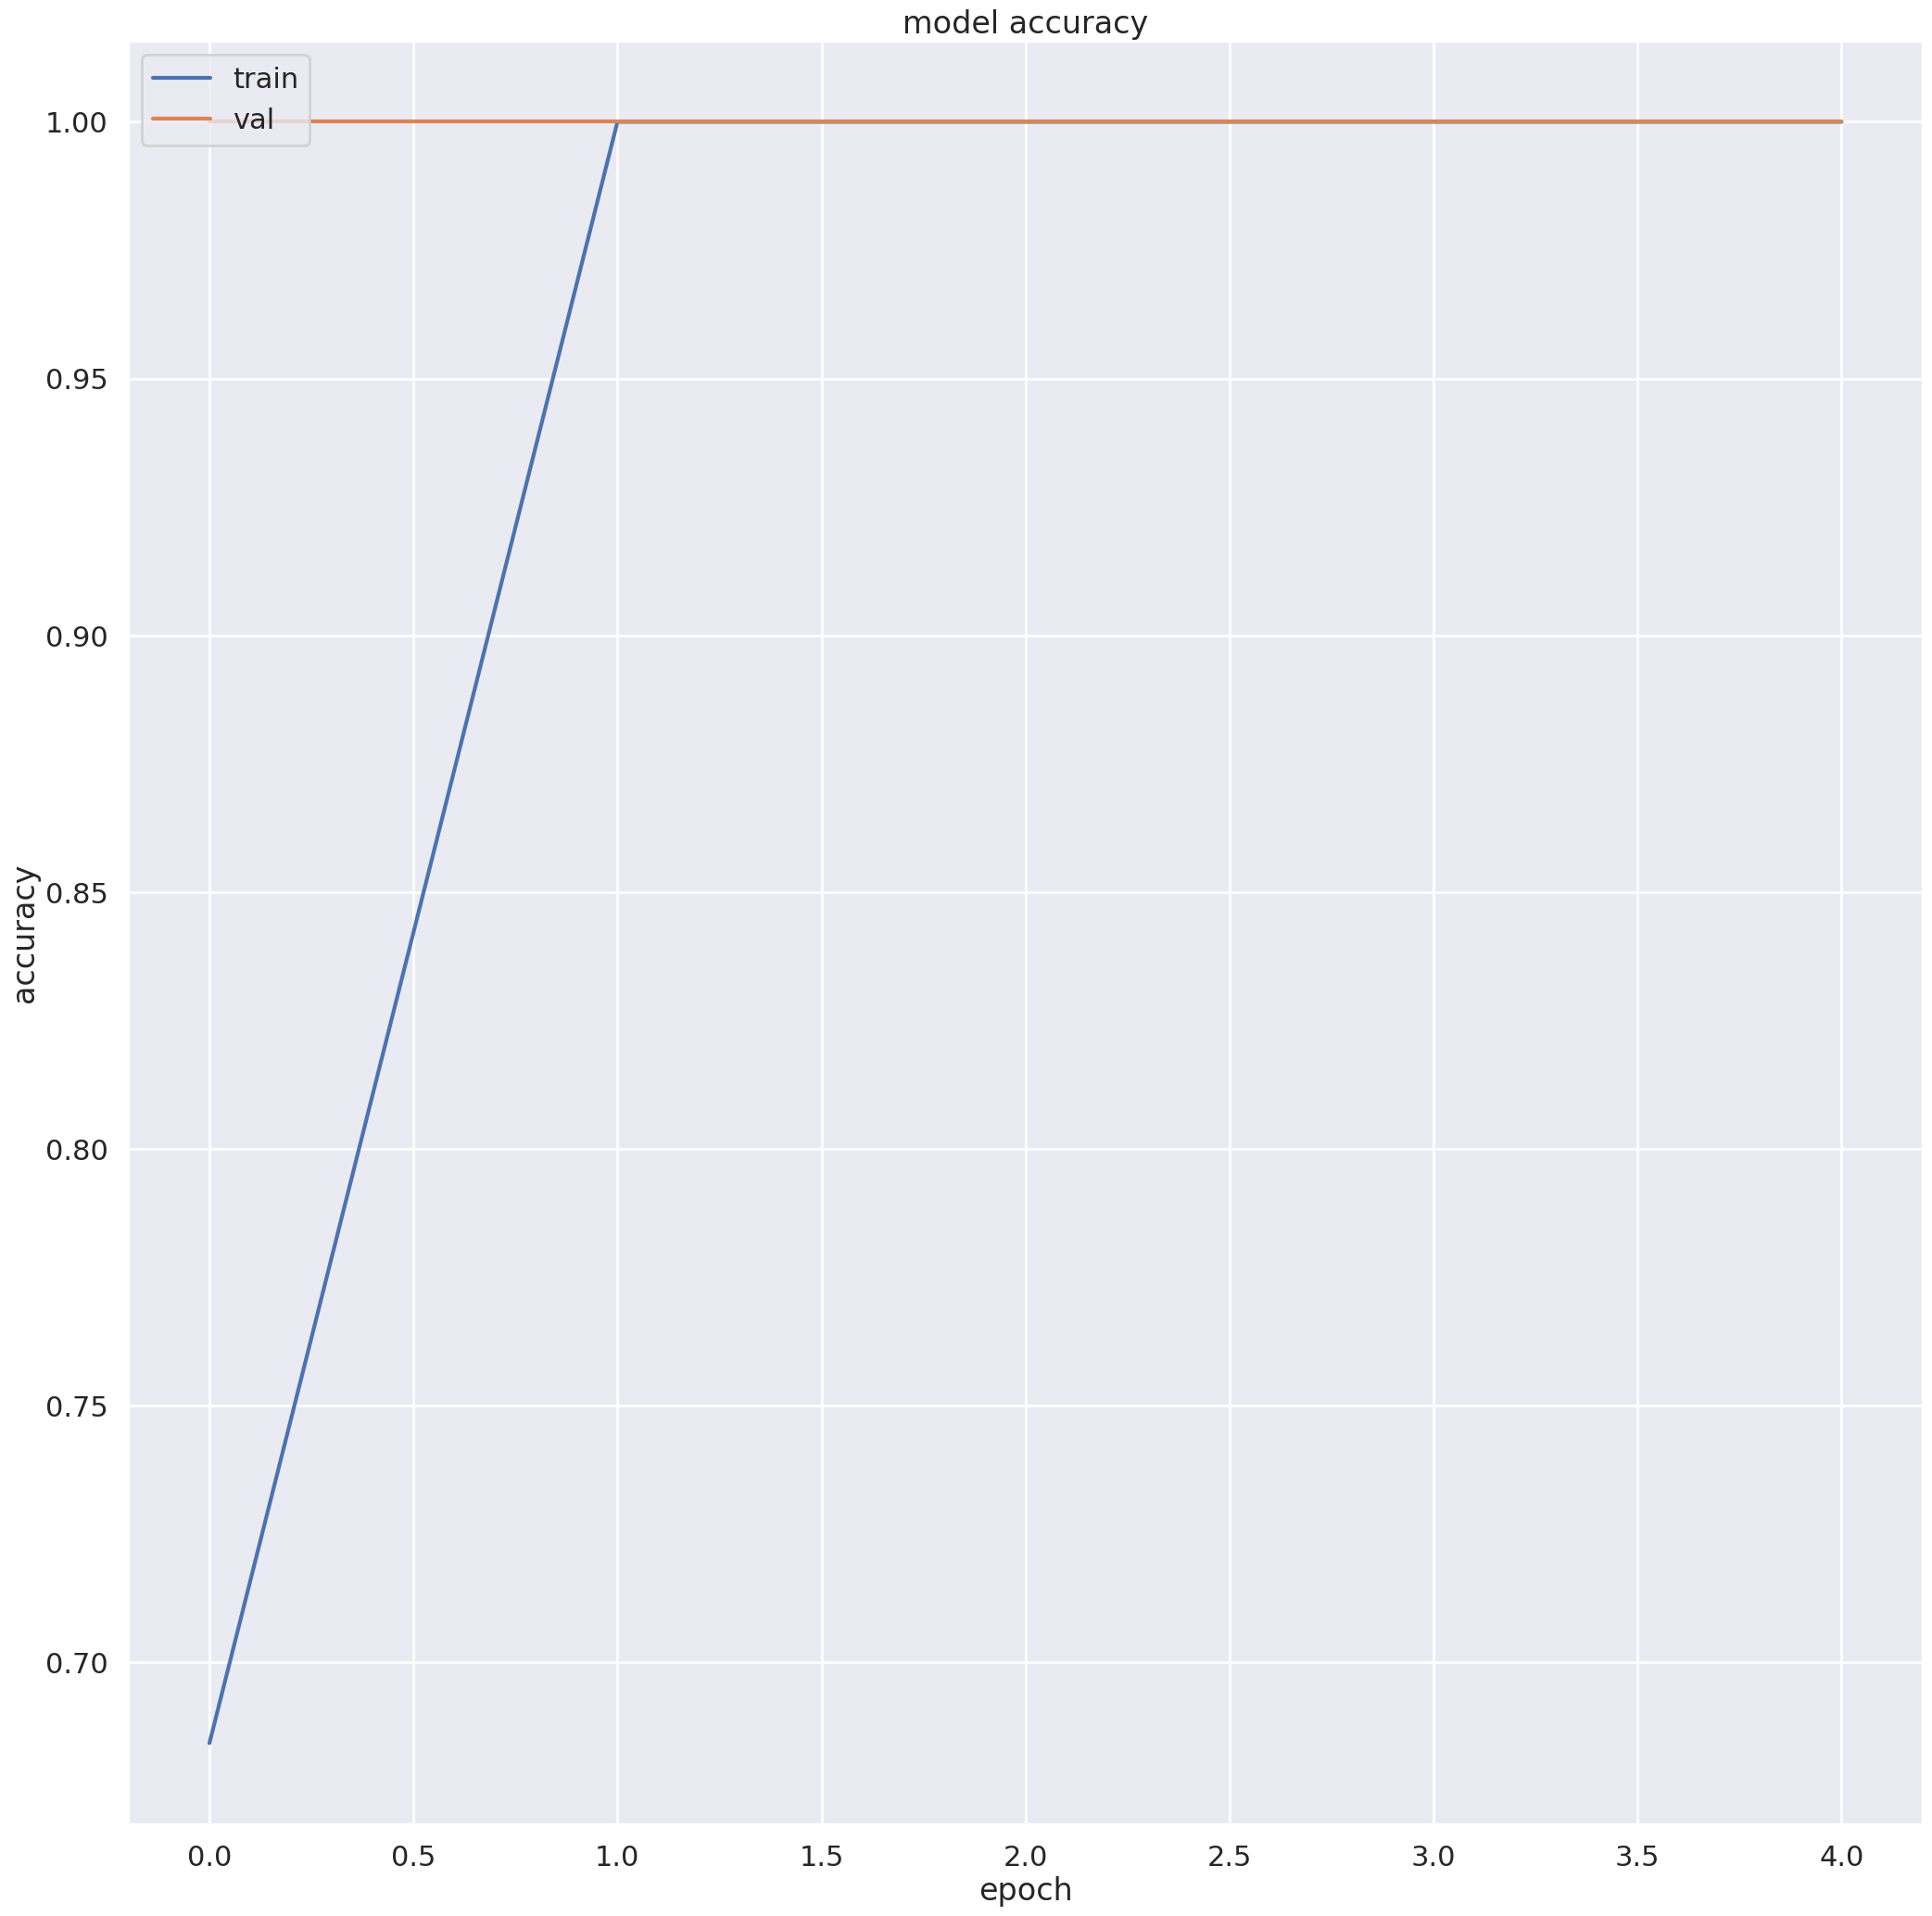

In [64]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize = (25, 25), dpi = 100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

In [65]:
import keras.saving
keras.saving.save_model(model, "model.keras")

In [67]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis = 0)
    return x

x = preprocess_image('/content/Apple_Scab/Apple_Scab/Sample_Scab(Apple)(4).JPG')

In [69]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess image
img_path = '/content/Apple_Scab/Apple_Scab/Sample_Scab(Apple)(4).JPG'  # <- replace with your image path
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = x / 255.0                        # normalize
x = np.expand_dims(x, axis=0)       # shape becomes (1, 224, 224, 3)

# Predict
predictions = model.predict(x)
print(predictions[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
[9.9998987e-01 4.6169100e-07 2.5582797e-06 7.1200152e-06]


In [71]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'Train'}

In [72]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

Train
